In [4]:
%load_ext autoreload
%autoreload 2

In [2]:
import urllib.request
import os

file = open('../model/oanc/oanc.pk','wb')

with urllib.request.urlopen('https://lium-cloud.univ-lemans.fr/index.php/s/d2gQ5DTK37DJq6H/download/model_consist_oanc0.pk') as response:
    file.write(response.read())
    
file.close()

FileNotFoundError: [Errno 2] No such file or directory: '../model/oanc/oanc.pk'

# OANC SINrVectors

In [1]:
import sinr.graph_embeddings as ge

vec_oanc = ge.SINrVectors('model/oanc/oanc')
vec_oanc.load()

# Sparsification : 200, 175, 150, 125, 100, 75, 50, 25 dimensions

In [2]:
import sinr.graph_embeddings as ge

#vec = ge.SINrVectors('/lium/raid01_c/sguillot/consistance/last_consist/bnc/model_consist_bnc0')
vec200 = ge.SINrVectors('oanc')
vec200.load()
vec200.sparsify(200)

sparsification: 100%|██████████| 20814/20814 [03:06<00:00, 111.85it/s]


In [3]:
import sinr.graph_embeddings as ge

#vec = ge.SINrVectors('/lium/raid01_c/sguillot/consistance/last_consist/bnc/model_consist_bnc0')
vec175 = ge.SINrVectors('oanc')
vec175.load()
vec175.sparsify(175)

sparsification: 100%|██████████| 20814/20814 [02:48<00:00, 123.56it/s]


In [4]:
import sinr.graph_embeddings as ge

#vec = ge.SINrVectors('/lium/raid01_c/sguillot/consistance/last_consist/bnc/model_consist_bnc0')
vec150 = ge.SINrVectors('oanc')
vec150.load()
vec150.sparsify(150)

sparsification: 100%|██████████| 20814/20814 [02:38<00:00, 131.72it/s]


In [5]:
import sinr.graph_embeddings as ge

#vec = ge.SINrVectors('/lium/raid01_c/sguillot/consistance/last_consist/bnc/model_consist_bnc0')
vec125 = ge.SINrVectors('oanc')
vec125.load()
vec125.sparsify(125)

sparsification: 100%|██████████| 20814/20814 [02:16<00:00, 152.61it/s]


In [6]:
import sinr.graph_embeddings as ge

#vec = ge.SINrVectors('/lium/raid01_c/sguillot/consistance/last_consist/bnc/model_consist_bnc0')
vec100 = ge.SINrVectors('oanc')
vec100.load()
vec100.sparsify(100)

sparsification: 100%|██████████| 20814/20814 [01:50<00:00, 187.94it/s]


In [7]:
import sinr.graph_embeddings as ge

#vec = ge.SINrVectors('/lium/raid01_c/sguillot/consistance/last_consist/bnc/model_consist_bnc0')
vec75 = ge.SINrVectors('oanc')
vec75.load()
vec75.sparsify(75)

sparsification: 100%|██████████| 20814/20814 [01:22<00:00, 250.91it/s]


In [8]:
import sinr.graph_embeddings as ge

#vec = ge.SINrVectors('/lium/raid01_c/sguillot/consistance/last_consist/bnc/model_consist_bnc0')
vec50 = ge.SINrVectors('oanc')
vec50.load()
vec50.sparsify(50)

sparsification: 100%|██████████| 20814/20814 [00:48<00:00, 426.45it/s] 


In [9]:
import sinr.graph_embeddings as ge

#vec = ge.SINrVectors('/lium/raid01_c/sguillot/consistance/last_consist/bnc/model_consist_bnc0')
vec25 = ge.SINrVectors('oanc')
vec25.load()
vec25.sparsify(25)

sparsification: 100%|██████████| 20814/20814 [00:23<00:00, 901.56it/s] 


### Similarity

In [10]:
import sinr.text.evaluate as ev

sim200 = ev.similarity_MEN_WS353_SCWS(vec200)
sim175 = ev.similarity_MEN_WS353_SCWS(vec175)
sim150 = ev.similarity_MEN_WS353_SCWS(vec150)
sim125 = ev.similarity_MEN_WS353_SCWS(vec125)
sim100 = ev.similarity_MEN_WS353_SCWS(vec100)
sim75 = ev.similarity_MEN_WS353_SCWS(vec75)
sim50 = ev.similarity_MEN_WS353_SCWS(vec50)
sim25 = ev.similarity_MEN_WS353_SCWS(vec25)


313 missing words
38 missing words
369 missing words
313 missing words
38 missing words
369 missing words
313 missing words
38 missing words
369 missing words
313 missing words
38 missing words
369 missing words
313 missing words
38 missing words
369 missing words
313 missing words
38 missing words
369 missing words
313 missing words
38 missing words
369 missing words
313 missing words
38 missing words
369 missing words


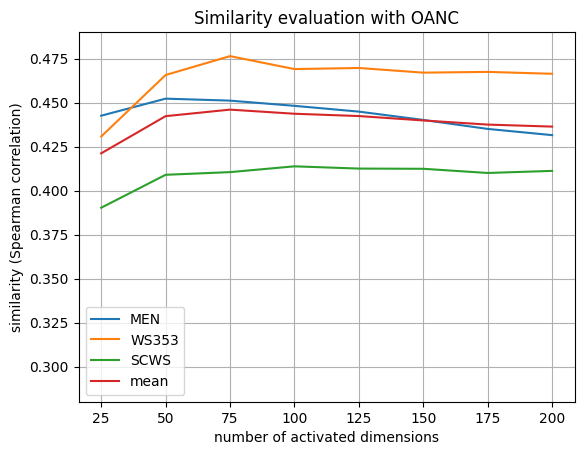

In [14]:
import numpy as np
import matplotlib.pyplot as plt

lsim = [sim200,sim175,sim150,sim125,sim100,sim75,sim50,sim25]

y_men = [sim['MEN'] for sim in lsim]
y_ws353 = [sim['WS353'] for sim in lsim]
y_scws = [sim['SCWS'] for sim in lsim]
y_mean = [(sim1 + sim2 + sim3)/3 for (sim1, sim2, sim3) in zip(y_men, y_ws353, y_scws)]

x = [200, 175, 150, 125, 100, 75, 50, 25]

plt.ylim(0.28, 0.49)

plt.plot(x, y_men, label = "MEN")
plt.plot(x, y_ws353, label = "WS353")
plt.plot(x, y_scws, label = "SCWS")
plt.plot(x, y_mean, label = "mean")
plt.legend()

plt.xlabel('number of activated dimensions') 
plt.ylabel('similarity (Spearman correlation)')

plt.title('Similarity evaluation with OANC')
plt.grid(True)

plt.savefig("similarity_oanc.png")
plt.show()


# Sparsification and binarization similarity_MEN_WS353_SCWS

In [15]:
import sinr.graph_embeddings as ge

In [16]:
vec200_bi = ge.SINrVectors('oanc')
vec200_bi.load()
vec200_bi.sparsify(200)
vec200_bi.binarize()

sparsification: 100%|██████████| 20814/20814 [03:00<00:00, 115.39it/s]


In [17]:
vec175_bi = ge.SINrVectors('oanc')
vec175_bi.load()
vec175_bi.sparsify(175)
vec175_bi.binarize()

sparsification: 100%|██████████| 20814/20814 [02:52<00:00, 120.43it/s]


In [18]:
vec150_bi = ge.SINrVectors('oanc')
vec150_bi.load()
vec150_bi.sparsify(150)
vec150_bi.binarize()

sparsification: 100%|██████████| 20814/20814 [02:34<00:00, 134.60it/s]


In [19]:
vec125_bi = ge.SINrVectors('oanc')
vec125_bi.load()
vec125_bi.sparsify(125)
vec125_bi.binarize()

sparsification: 100%|██████████| 20814/20814 [02:16<00:00, 152.64it/s]


In [20]:
vec100_bi = ge.SINrVectors('oanc')
vec100_bi.load()
vec100_bi.sparsify(100)
vec100_bi.binarize()

sparsification: 100%|██████████| 20814/20814 [01:50<00:00, 187.81it/s]


In [21]:
vec75_bi = ge.SINrVectors('oanc')
vec75_bi.load()
vec75_bi.sparsify(75)
vec75_bi.binarize()

sparsification: 100%|██████████| 20814/20814 [01:22<00:00, 251.22it/s]


In [22]:
vec50_bi = ge.SINrVectors('oanc')
vec50_bi.load()
vec50_bi.sparsify(50)
vec50_bi.binarize()

sparsification: 100%|██████████| 20814/20814 [00:50<00:00, 410.60it/s] 


In [23]:
vec25_bi = ge.SINrVectors('oanc')
vec25_bi.load()
vec25_bi.sparsify(25)
vec25_bi.binarize()

sparsification: 100%|██████████| 20814/20814 [00:24<00:00, 866.15it/s] 


### Similarity

In [26]:
import sinr.text.evaluate as ev

sim200_bi = ev.similarity_MEN_WS353_SCWS(vec200_bi)
sim175_bi = ev.similarity_MEN_WS353_SCWS(vec175_bi)
sim150_bi = ev.similarity_MEN_WS353_SCWS(vec150_bi)
sim125_bi = ev.similarity_MEN_WS353_SCWS(vec125_bi)
sim100_bi = ev.similarity_MEN_WS353_SCWS(vec100_bi)
sim75_bi = ev.similarity_MEN_WS353_SCWS(vec75_bi)
sim50_bi = ev.similarity_MEN_WS353_SCWS(vec50_bi)
sim25_bi = ev.similarity_MEN_WS353_SCWS(vec25_bi)

313 missing words
38 missing words
369 missing words
313 missing words
38 missing words
369 missing words
313 missing words
38 missing words
369 missing words
313 missing words
38 missing words
369 missing words
313 missing words
38 missing words
369 missing words
313 missing words
38 missing words
369 missing words
313 missing words
38 missing words
369 missing words
313 missing words
38 missing words
369 missing words


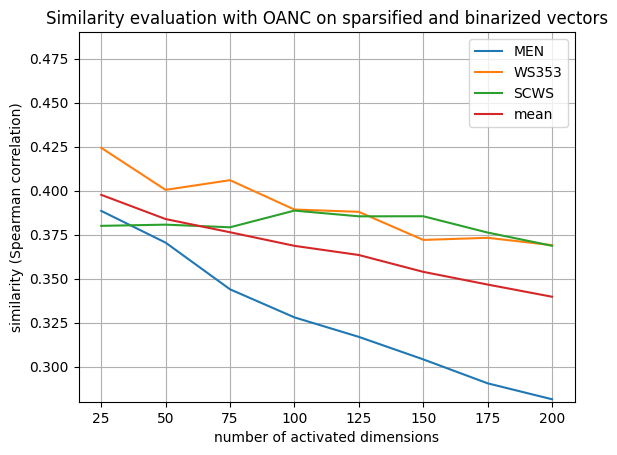

In [29]:
import numpy as np
import matplotlib.pyplot as plt

lsim = [sim200_bi,sim175_bi,sim150_bi,sim125_bi,sim100_bi,sim75_bi,sim50_bi,sim25_bi]

y_men_bin = [sim['MEN'] for sim in lsim]
y_ws353_bin = [sim['WS353'] for sim in lsim]
y_scws_bin = [sim['SCWS'] for sim in lsim]
y_mean_bin = [(sim1 + sim2 + sim3)/3 for (sim1, sim2, sim3) in zip(y_men_bin, y_ws353_bin, y_scws_bin)]


x = [200, 175, 150, 125, 100, 75, 50, 25]

plt.ylim(0.28, 0.49)

plt.plot(x, y_men_bin, label = "MEN")
plt.plot(x, y_ws353_bin, label = "WS353")
plt.plot(x, y_scws_bin, label = "SCWS")
plt.plot(x, y_mean_bin, label = "mean")
plt.legend()

plt.xlabel('number of activated dimensions') 
plt.ylabel('similarity (Spearman correlation)')

plt.title('Similarity evaluation with OANC on sparsified and binarized vectors')
plt.grid(True)

plt.show()

# Binarized vs non binarized vectors

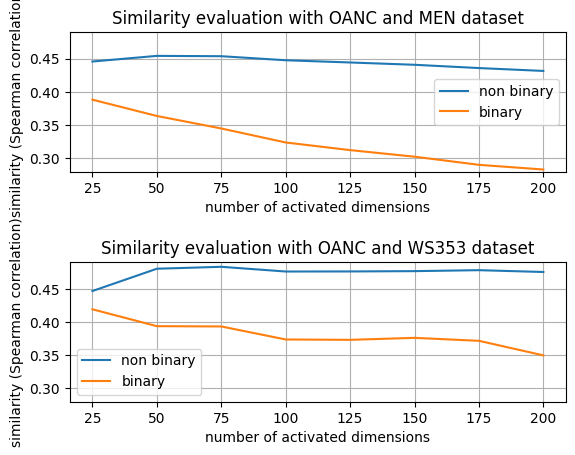

In [25]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.plot(x, y_men, label = "non binary")
plt.plot(x, y_men_bin, label = "binary")
plt.ylim(0.28, 0.49)
plt.legend()
plt.xlabel('number of activated dimensions') 
plt.ylabel('similarity (Spearman correlation)')
plt.title('Similarity evaluation with OANC and MEN dataset')
plt.grid(True)

plt.subplot(212)
plt.plot(x, y_ws353, label = "non binary")
plt.plot(x, y_ws353_bin, label = "binary")
plt.ylim(0.28, 0.49)
plt.legend()
plt.xlabel('number of activated dimensions') 
plt.ylabel('similarity (Spearman correlation)')
plt.title('Similarity evaluation with OANC and WS353 dataset')
plt.grid(True)

plt.subplots_adjust(hspace=0.65)

plt.show()

# SIMLEX

In [2]:
import sinr.text.evaluate as ev

In [3]:
simlex = ev.fetch_SIMLEX()

In [4]:
ev.eval_similarity(vec_oanc, simlex)

eval similarity:   0%|          | 0/665 [00:00<?, ?it/s]

46 missing words


0.14543551115369